### Загрузка библиотек:

In [1]:
# 1. Основные библиотеки
import numpy as np
import pandas as pd
import pickle   # сохранение модели

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score


# 3. Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 4. Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
matplotlib.rcParams.update({'font.size': 14})

In [4]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    """
    # дописать документация
    """
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Valid R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    """
    # расчет переобучения
    """
    aaa = round(r2(train_true_values, train_pred_values), 3)
    bbb = round(r2(test_true_values, test_pred_values), 3)
    if aaa>bbb: ccc = round((((aaa-bbb)/aaa)*100),2)
    if aaa<bbb: ccc = round((((bbb-aaa)/bbb)*100),2)
    print("Overfitting:    " + str(ccc) + "%")
    
    plt.figure(figsize=(18,10))
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

### Загрузка данных:

In [5]:
TRAIN_DATASET_PATH = './/train.csv'
TEST_DATASET_PATH = './/test.csv'
TRAIN_PREPARED_DATASET_PATH = './/prepared_train_hard.csv'
TEST_PREPARED_DATASET_PATH = './/prepared_test_hard.csv'

### Обзор датасета:

In [6]:
dftr = pd.read_csv(TRAIN_DATASET_PATH, sep=',')
dftr.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [7]:
dftst = pd.read_csv(TEST_DATASET_PATH, sep=',')
dftst.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


In [8]:
dftr.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [9]:
dftst.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [10]:
dftr.index

RangeIndex(start=0, stop=10000, step=1)

In [11]:
dftst.index

RangeIndex(start=0, stop=5000, step=1)

### Оценка и приведение типов:

In [12]:
dftr.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [13]:
dftst.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [14]:
dftr.dtypes.value_counts()

int64      9
float64    8
object     3
dtype: int64

In [15]:
dftst.dtypes.value_counts()

int64      9
float64    7
object     3
dtype: int64

In [16]:
dftr['Id'] = dftr['Id'].astype(str)
dftr['DistrictId'] = dftr['DistrictId'].astype(str)
dftr['Rooms'] = dftr['Rooms'].astype(int)
dftr['Square'] = dftr['Square'].round(1)
dftr['LifeSquare'] = dftr['LifeSquare'].round(1)
dftr['KitchenSquare'] = dftr['KitchenSquare'].round(1)
dftr['HouseFloor'] = dftr['HouseFloor'].astype(int)
dftr['HouseYear'] = dftr['HouseYear'].astype(np.int16)
dftr.rename(columns={'Helthcare_2': 'Healthcare_2'}, inplace=True)
dftr['Price'] = dftr['Price'].round(2)

In [17]:
dftst['Id'] = dftst['Id'].astype(str)
dftst['DistrictId'] = dftst['DistrictId'].astype(str)
dftst['Rooms'] = dftst['Rooms'].astype(int)
dftst['Square'] = dftst['Square'].round(1)
dftst['LifeSquare'] = dftst['LifeSquare'].round(1)
dftst['KitchenSquare'] = dftst['KitchenSquare'].round(1)
dftst['HouseFloor'] = dftst['HouseFloor'].astype(int)
dftst['HouseYear'] = dftr['HouseYear'].astype(np.int16)
dftst.rename(columns={'Helthcare_2': 'Healthcare_2'}, inplace=True)

In [18]:
dftr.dtypes.value_counts()

float64    6
int64      6
object     5
int32      2
int16      1
dtype: int64

In [19]:
dftst.dtypes.value_counts()

int64      6
object     5
float64    5
int32      2
int16      1
dtype: int64

### Устранение отсутствующих значений:

In [20]:
print(dftr['Healthcare_1'].isnull().sum())
print(dftst['Healthcare_1'].isnull().sum())

4798
2377


In [21]:
print(dftr['LifeSquare'].isnull().sum())
print(dftst['LifeSquare'].isnull().sum())

2113
1041


In [22]:
print(dftr['Healthcare_1'].median())
print(dftst['Healthcare_1'].median())

900.0
900.0


In [23]:
dftr['Healthcare_1_nan'] = 0
dftst['Healthcare_1_nan'] = 0
dftr.loc[dftr['Healthcare_1'].isnull(), 'Healthcare_1_nan'] = 1
dftst.loc[dftst['Healthcare_1'].isnull(), 'Healthcare_1_nan'] = 1
print(dftr['Healthcare_1_nan'].sum())
print(dftst['Healthcare_1_nan'].sum())

4798
2377


In [24]:
HKmed = dftr['Healthcare_1'].median()
dftr['Healthcare_1'] = dftr['Healthcare_1'].fillna(HKmed)
dftst['Healthcare_1'] = dftst['Healthcare_1'].fillna(HKmed)

In [25]:
dftr['Healthcare_1'] = dftr['Healthcare_1'].astype(int)
dftst['Healthcare_1'] = dftr['Healthcare_1'].astype(int)

In [26]:
dftr['LifeSquare_nan'] = 0
dftst['LifeSquare_nan'] = 0
dftr.loc[dftr['LifeSquare'].isnull(), 'LifeSquare_nan'] = 1
dftst.loc[dftst['LifeSquare'].isnull(), 'LifeSquare_nan'] = 1
print(dftr['LifeSquare_nan'].sum())
print(dftst['LifeSquare_nan'].sum())

2113
1041


#### На этапе построения модели, после анализа признаков было принято решение удалить Healthcare_1_nan, а чуть ниже и LifeSquare_nan из датасета.

In [27]:
dftr.drop('Healthcare_1_nan', axis=1, inplace=True)
dftst.drop('Healthcare_1_nan', axis=1, inplace=True)


#### Перед тем как заполнять отсутствующие значения 'LifeSquare', введем новый признак 'OtherSquare', определяющий площадь коридоров, кладовок и лоджий из имеющихся данных.

In [28]:
dftr['OtherSquare'] = dftr['Square'] - (dftr['LifeSquare'] + dftr['KitchenSquare'])
dftst['OtherSquare'] = dftst['Square'] - (dftst['LifeSquare'] + dftst['KitchenSquare'])

In [29]:
(dftr['OtherSquare'] < 0).sum()

836

In [30]:
(dftst['OtherSquare'] < 0).sum()

435

#### Выявились отрицательные значения 'OtherSquare', требующие устранения путем редактирования значений известных площадей. Изменяем признак 'Square' путем сложения двух известных площадей, затем вновь перерасчитываем 'OtherSquare'.

In [31]:
dftr.loc[dftr['OtherSquare'] < 0, 'Square'] = dftr['LifeSquare'] + dftr['KitchenSquare']
dftr['OtherSquare'] = dftr['Square'] - (dftr['LifeSquare'] + dftr['KitchenSquare'])
(dftr['OtherSquare'] < 0).sum()

0

In [32]:
dftst.loc[dftst['OtherSquare'] < 0, 'Square'] = dftst['LifeSquare'] + dftst['KitchenSquare']
dftst['OtherSquare'] = dftst['Square'] - (dftst['LifeSquare'] + dftst['KitchenSquare'])
(dftst['OtherSquare'] < 0).sum()

0

####  Находим медиану 'OtherSquare'.

In [33]:
OSmedTR = dftr['OtherSquare'].median()
OSmedTR

11.399999999999999

In [34]:
OSmedTST = dftst['OtherSquare'].median()
OSmedTST

11.399999999999999

In [35]:
(dftr['OtherSquare'] == 0).sum()

849

In [36]:
(dftst['OtherSquare'] == 0).sum()

441

#### Теперь необходимо устранить нулевые значения 'OtherSquare' чтобы во всех квартирах присутствовала площадь коридоров, кладовок и лоджий. Для этого вычитаем медианное значение 'OtherSquare' из 'LifeSquare' там, где 'OtherSquare' меньше нуля и, перерасчитывая его, убеждаемся, что нулевые значения отсутствуют.

In [37]:
dftr.loc[dftr['OtherSquare'] == 0, 'LifeSquare'] = dftr['LifeSquare'] - OSmedTR
dftst.loc[dftst['OtherSquare'] == 0, 'LifeSquare'] = dftst['LifeSquare'] - OSmedTST

In [38]:
dftr['OtherSquare'] = dftr['Square'] - (dftr['LifeSquare'] + dftr['KitchenSquare'])
dftst['OtherSquare'] = dftst['Square'] - (dftst['LifeSquare'] + dftst['KitchenSquare'])

In [39]:
(dftr['OtherSquare'] == 0).sum()

0

In [40]:
(dftst['OtherSquare'] == 0).sum()

0

#### Наконец, заполняем отсутствующие значения 'LifeSquare' с учетом теперь известного медианного значения площади коридоров, кладовок и лоджий, и последний раз перерасчитываем 'OtherSquare' с учетом этих изменений, что приводит к единообразию всех площадей датасета.

In [41]:
dftr.loc[dftr['LifeSquare_nan'] == 1, 'LifeSquare'] = dftr['Square'] - dftr['KitchenSquare'] - OSmedTR
dftst.loc[dftst['LifeSquare_nan'] == 1, 'LifeSquare'] = dftst['Square'] - dftst['KitchenSquare'] - OSmedTST
dftr['OtherSquare'] = dftr['Square'] - (dftr['LifeSquare'] + dftr['KitchenSquare'])
dftst['OtherSquare'] = dftst['Square'] - (dftst['LifeSquare'] + dftst['KitchenSquare'])
dftr.drop('LifeSquare_nan', axis=1, inplace=True)
dftst.drop('LifeSquare_nan', axis=1, inplace=True)

In [42]:
dftr.isnull().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Healthcare_2     0
Shops_1          0
Shops_2          0
Price            0
OtherSquare      0
dtype: int64

In [43]:
dftst.isnull().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Healthcare_2     0
Shops_1          0
Shops_2          0
OtherSquare      0
dtype: int64

### Поиск аномальных значений и выбросов:

#### Замечено нулевое количество комнат.

In [44]:
(dftr['Rooms'] < 1).sum()

8

In [45]:
(dftst['Rooms'] < 1).sum()

2

#### Вычисляем статистически необходимое количество комнат для заполнения по известной общей площади.

In [46]:
dftr.loc[dftr['Rooms'] < 1, 'Rooms'] = dftr.loc[dftr['Square'].between(38, 139, inclusive=True), 'Rooms'].median()
dftst.loc[dftst['Rooms'] < 1, 'Rooms'] = dftst.loc[dftst['Square'].between(70, 120, inclusive=True), 'Rooms'].median()

#### Замечено нулевое количество этажей и значения этажей больше этажностей домов.

In [47]:
(dftr['HouseFloor'] < 1).sum()

269

In [48]:
(dftst['HouseFloor'] < 1).sum()

131

In [49]:
(dftr['HouseFloor'] < dftr['Floor']).sum()

1825

In [50]:
(dftst['HouseFloor'] < dftst['Floor']).sum()

884

#### Было принято решение нулевое количество этажей, в виду незначительного влияния на общее количество наблюдений, приравнять к этажу квартиры, а превышение квартирой этажности дома заменить на значение, при котором этаж квартиры принимает отрицательное значение только в 1 и 2 этажных домах. Образовавшиеся отрицательные этажности приравниваются к этажности дома.

In [51]:
dftr.loc[dftr['HouseFloor'] < 1, 'HouseFloor'] = dftr['Floor']
dftst.loc[dftst['HouseFloor'] < 1, 'HouseFloor'] = dftst['Floor']

In [52]:
dftr.loc[dftr['HouseFloor'] < dftr['Floor'], 'Floor'] = (dftr['HouseFloor'] -  dftr['Floor']/8)
dftst.loc[dftst['HouseFloor'] < dftst['Floor'], 'Floor'] = (dftst['HouseFloor'] -  dftst['Floor']/8)
dftr['Floor'] = dftr['Floor'].astype(int)
dftst['Floor'] = dftst['Floor'].astype(int)

In [53]:
dftr.loc[dftr['Floor'] < 1, 'Floor'] = dftr['HouseFloor']
dftst.loc[dftst['Floor'] < 1, 'Floor'] = dftst['HouseFloor']

### Статистический поиск выбросов: статистический поиск производился с помощью BoxPlot, а затем принимались самостоятельные логические решения.

#### Количество комнат:

In [54]:
max_tr = np.quantile(dftr['Rooms'], q=0.99)
min_tr = np.quantile(dftr['Rooms'], q=0.01)
val = (dftr['Rooms'] > max_tr)|(dftr['Rooms'] < min_tr)
dftr[val]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price,OtherSquare
403,13434,13,5,183.4,101.0,15.0,2,6,1997,0.090799,...,B,74,19083,2,900,5,15,B,622888.83,67.4
505,3454,8,5,112.1,79.8,10.0,4,17,1999,0.437885,...,B,23,5735,3,1084,0,5,B,471833.79,22.3
511,8685,62,5,124.9,81.1,30.0,2,3,2017,0.072158,...,B,2,629,1,900,0,0,A,271919.87,13.8
940,4971,169,5,117.9,76.6,9.0,12,14,2001,0.178917,...,B,18,3594,4,192,1,5,B,608674.13,32.3
1459,8901,34,5,121.6,114.9,1.0,1,1,1977,0.069753,...,B,53,13670,4,900,1,11,B,455446.39,5.7
1906,5548,86,5,275.6,233.9,26.0,12,37,2011,0.161976,...,A,31,7010,5,4508,3,7,B,455264.88,15.7
1909,238,88,5,90.8,71.0,5.0,1,9,1972,0.127376,...,B,43,8429,3,900,3,9,B,289683.94,14.8
2004,5927,57,10,59.1,36.2,10.0,22,22,2002,0.090799,...,B,74,19083,2,900,5,15,B,317265.32,12.9
2516,338,46,5,147.7,136.3,0.0,6,6,1977,0.150818,...,B,16,3433,4,2643,4,5,B,352168.96,11.4
2728,14865,9,10,60.9,38.4,10.0,1,2,1994,0.161532,...,B,25,5648,1,30,2,4,B,172329.27,12.5


In [55]:
max_tst = np.quantile(dftst['Rooms'], q=0.99)
min_tst = np.quantile(dftst['Rooms'], q=0.1)
val = (dftst['Rooms'] > max_tst)|(dftst['Rooms'] < min_tst)
dftst[val]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,OtherSquare
374,8638,25,5,120.3,115.3,1.0,14,25,1963,0.069753,B,B,53,13670,4,46,1,11,B,4.0
797,13562,78,5,116.7,69.6,10.0,5,14,1977,0.219006,B,B,28,6746,3,900,1,4,B,37.1
956,4058,27,6,223.5,104.1,16.0,2,2,1997,0.041116,B,B,53,14892,4,1937,1,4,B,103.4
1117,3747,23,5,139.0,89.8,42.0,1,3,1977,0.014073,B,B,2,475,0,540,0,0,B,7.2
1631,6060,53,5,56.6,2.7,1.0,6,18,1985,0.049637,B,B,34,7759,0,645,1,3,B,52.9
1929,12316,183,5,158.0,101.0,12.0,7,8,1977,0.246624,B,B,14,2940,45,176,3,6,B,45.0
1981,1435,111,17,52.9,32.5,8.0,15,17,1960,0.093443,B,B,23,4635,5,1894,2,4,B,12.4
2243,10793,23,6,110.8,99.4,0.0,2,2,1982,0.014073,B,B,2,475,0,900,0,0,B,11.4
2659,15858,9,5,97.5,63.6,8.0,5,14,1968,0.136244,B,B,11,2370,0,900,0,1,B,25.9
4088,6553,34,5,122.4,0.3,0.0,9,9,1955,0.069753,B,B,53,13670,4,900,1,11,B,122.1


#### Было принято решение количество комнат более 4 приравнять к 4.

In [56]:
dftr.loc[dftr['Rooms'] > max_tr, 'Rooms'] = 4
dftst.loc[dftst['Rooms'] > max_tst, 'Rooms'] = 4


#### Общая площадь:

In [57]:
(dftr['Square'] > 200).sum()

14

In [58]:
(dftst['Square'] > 200).sum()

5

#### В виду немногочисленности площадей более 200 квм, было принято решение приравянть все такие площади к медианным значениям.

In [59]:
dftr['Square_big'] = 0
dftst['Square_big'] = 0

dftr.loc[dftr['Square'] > 200, 'Square_big'] = 1
dftr.loc[dftr['Square_big'] == 1, 'Square'] = dftr['Square'].median()
dftr.loc[dftr['Square_big'] == 1, 'LifeSquare'] = dftr['LifeSquare'].median()
dftr.loc[dftr['Square_big'] == 1, 'KitchenSquare'] = dftr['KitchenSquare'].median()
dftr.loc[dftr['Square_big'] == 1, 'OtherSquare'] = OSmedTR

dftst.loc[dftst['Square'] > 200, 'Square_big'] = 1
dftst.loc[dftst['Square_big'] == 1, 'Square'] = dftst['Square'].median()
dftst.loc[dftst['Square_big'] == 1, 'LifeSquare'] = dftst['LifeSquare'].median()
dftst.loc[dftst['Square_big'] == 1, 'KitchenSquare'] = dftst['KitchenSquare'].median()
dftst.loc[dftst['Square_big'] == 1, 'OtherSquare'] = OSmedTST

dftr.drop('Square_big', axis=1, inplace=True)
dftst.drop('Square_big', axis=1, inplace=True)

#### Этажность дома:

In [60]:
(dftr['HouseFloor'] > 30).sum()

28

In [61]:
(dftst['HouseFloor'] > 30).sum()

23

#### Было принято решение считать дома с этажностью более 30 за выбросы. Приравниваем их к медиане.

In [62]:
dftr.loc[dftr['HouseFloor'] > 30, 'HouseFloor'] = dftr['HouseFloor'].median()
dftst.loc[dftst['HouseFloor'] > 30, 'HouseFloor'] = dftst['HouseFloor'].median()

In [63]:
(dftr['HouseFloor']<dftr['Floor']).sum()

14

In [64]:
(dftst['HouseFloor']<dftst['Floor']).sum()

15

#### Снова появилась проблема превышения этажности дома квартирами. Исправляем с помощью несложной формулы.

In [65]:
dftr.loc[dftr['HouseFloor'] < dftr['Floor'], 'Floor'] = dftr['HouseFloor'] - int(dftr['Floor'].median()/2)
dftst.loc[dftst['HouseFloor'] < dftst['Floor'], 'Floor'] = dftst['HouseFloor'] - int(dftst['Floor'].median()/2)

In [66]:
(dftr['HouseFloor']<dftr['Floor']).sum()

0

In [67]:
(dftst['HouseFloor']<dftst['Floor']).sum()

0

#### Дата постройка дома:

#### Выявляем и исправляем вручную аномальные значения дат постройки домов.

In [68]:
dftr[(dftr['HouseYear'] > 2020) | (dftr['HouseYear'] < 1900)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price,OtherSquare
8828,11607,147,2,44.8,28.4,5.0,4,9,4968,0.319809,...,B,25,4756,16,2857,5,8,B,243028.60,11.4
9163,10814,109,1,37.3,20.2,9.0,9,12,-2005,0.136330,...,B,30,6141,10,262,3,6,B,254084.53,8.1


In [69]:
dftst[(dftst['HouseYear'] > 2020) | (dftst['HouseYear'] < 1900)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,OtherSquare


In [70]:
dftr.loc[8828, 'HouseYear'] = 1968

In [71]:
dftr.loc[9163, 'HouseYear'] = 2005

### График распределения целевой переменной:

In [72]:
target_mean = round(dftr['Price'].mean(), 2)
target_median = dftr['Price'].median()
target_mode = dftr['Price'].mode()[0]

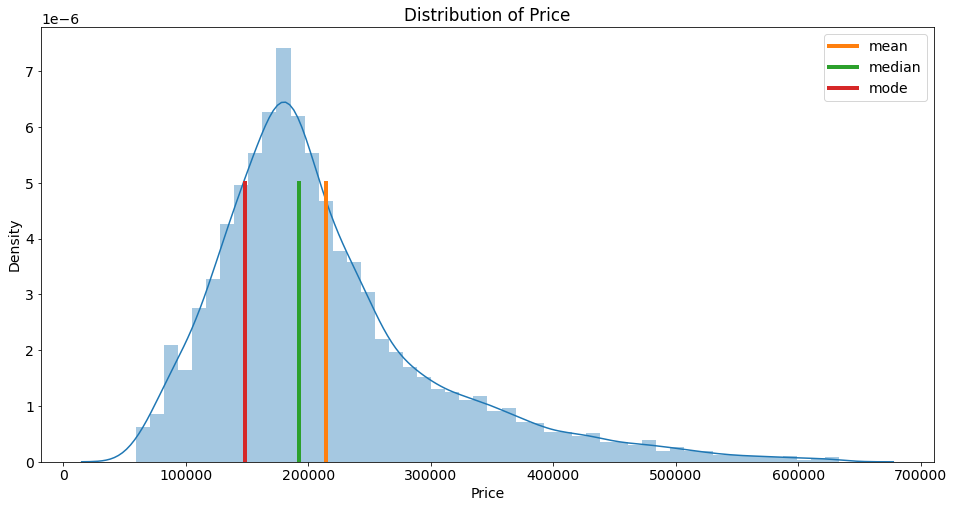

In [73]:
plt.figure(figsize = (16, 8))

sns.distplot(dftr['Price'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean',  linewidth=4)
plt.plot([target_median] * 10, y, label='median',  linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

### Матрицы гистограмм признаков:

#### Тренировочные признаки

In [74]:
dftr_num_features = dftr.select_dtypes(include=['float64', 'float32', 'float16', 'int32', 'int64', 'int16'])
dftr_num_features.drop('Price', axis=1, inplace=True)
dftr_num_features.drop('Healthcare_2', axis=1, inplace=True)
dftr_num_features.drop('Shops_1', axis=1, inplace=True)

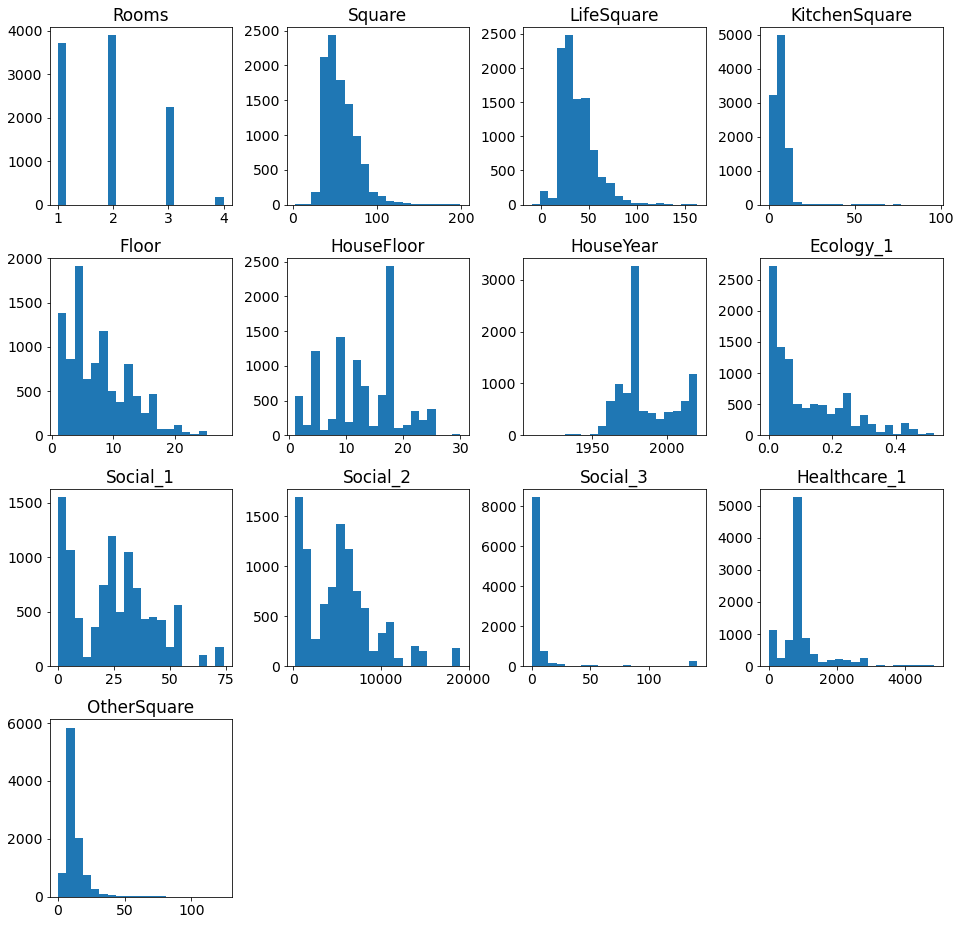

In [75]:
dftr_num_features.hist(figsize=(16,16), bins=20, grid=False);

#### Тестовые признаки

In [76]:
dftst_num_features = dftst.select_dtypes(include=['float64', 'float32', 'float16', 'int32', 'int64', 'int16'])
dftst_num_features.drop('Healthcare_2', axis=1, inplace=True)
dftst_num_features.drop('Shops_1', axis=1, inplace=True)

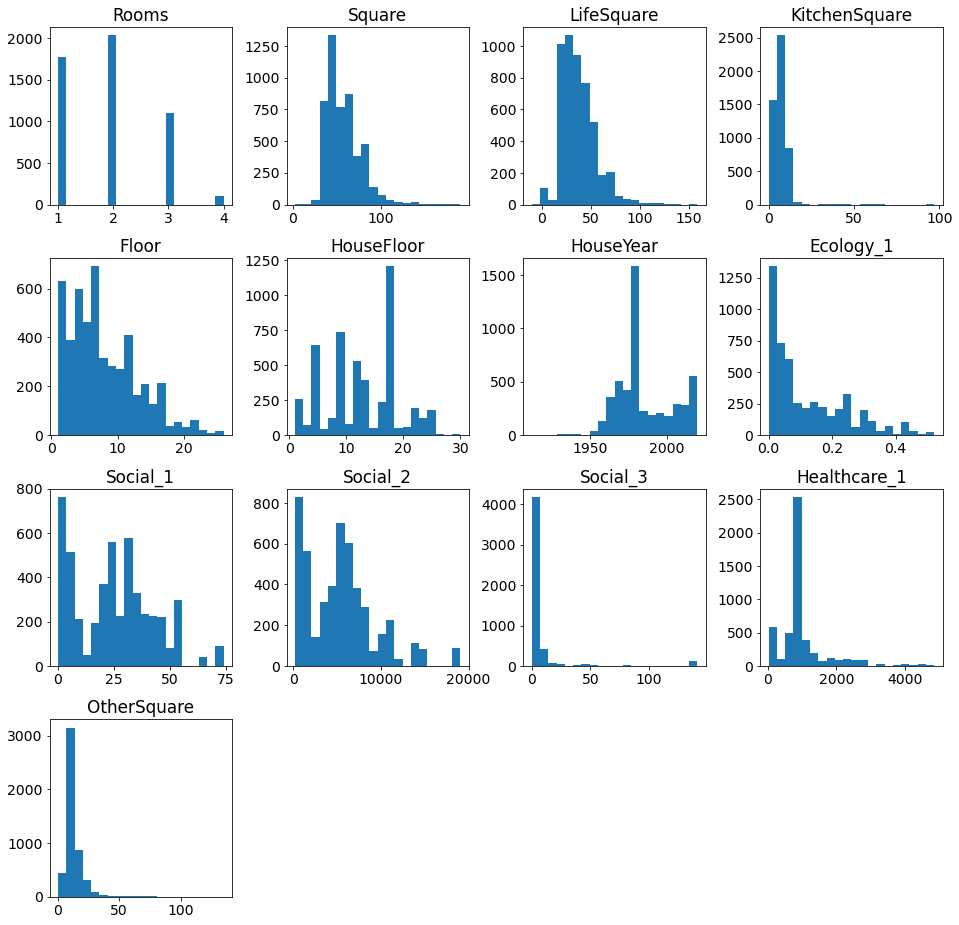

In [77]:
dftst_num_features.hist(figsize=(16,16), bins=20, grid=False);

#### В данном варианте обработки датасета было принято решение не исправлять обнаруженные статистическими методами выбросы по Rooms, KitchenSquare, HouseYear, Social_3, Healthcare_1 и OtherSquare в силу того, что квартиры с такими "выбросными" признаками имеют место быть и возможно модель обучится с ними лучше, чем без них.

### Гистограммы категориальных признаков:

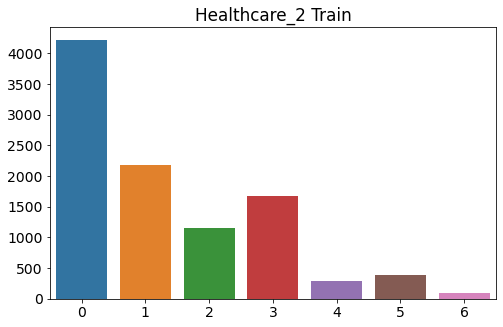

In [78]:
countsTR = dftr['Healthcare_2'].value_counts()
    
plt.figure(figsize=(8,5))    
plt.title('Healthcare_2 Train')
sns.barplot(countsTR.index, countsTR.values)
    
plt.show()

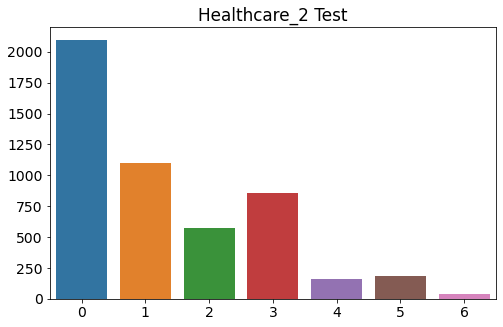

In [79]:
countsTST = dftst['Healthcare_2'].value_counts()
    
plt.figure(figsize=(8,5))    
plt.title('Healthcare_2 Test')
sns.barplot(countsTST.index, countsTST.values)
    
plt.show()

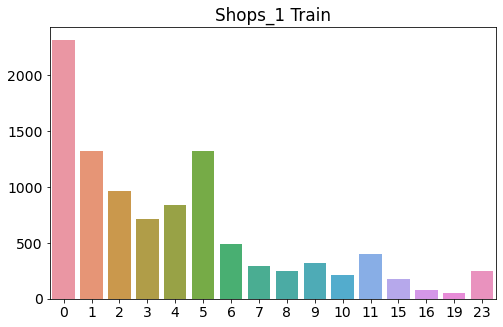

In [80]:
counts = dftr['Shops_1'].value_counts()
    
plt.figure(figsize=(8,5))    
plt.title('Shops_1 Train')
sns.barplot(counts.index, counts.values)
    
plt.show()

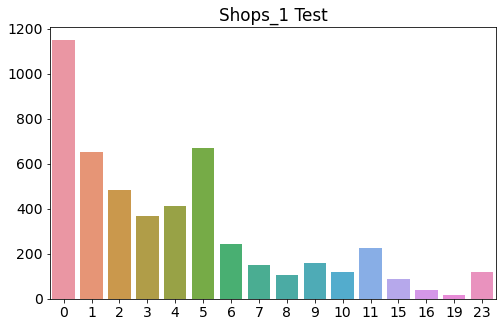

In [81]:
counts = dftst['Shops_1'].value_counts()
    
plt.figure(figsize=(8,5))    
plt.title('Shops_1 Test')
sns.barplot(counts.index, counts.values)
    
plt.show()

### Вводим дополнительные признаки:

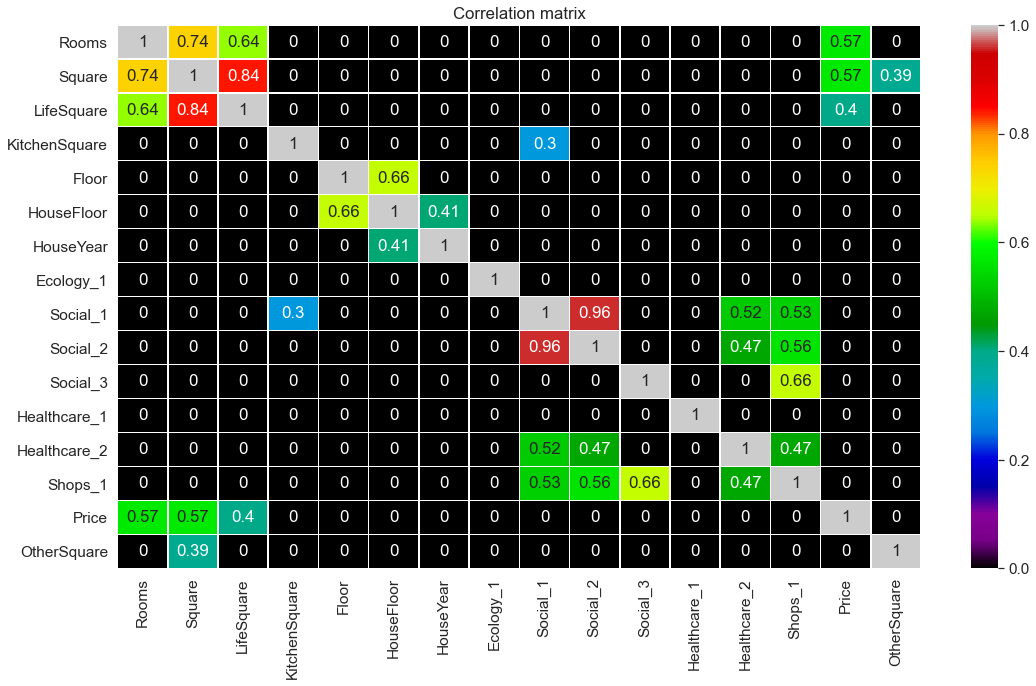

In [82]:
plt.figure(figsize = (18,10))

sns.set(font_scale=1.4)

corr_matrix = dftr.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='nipy_spectral')

plt.title('Correlation matrix')
plt.show()

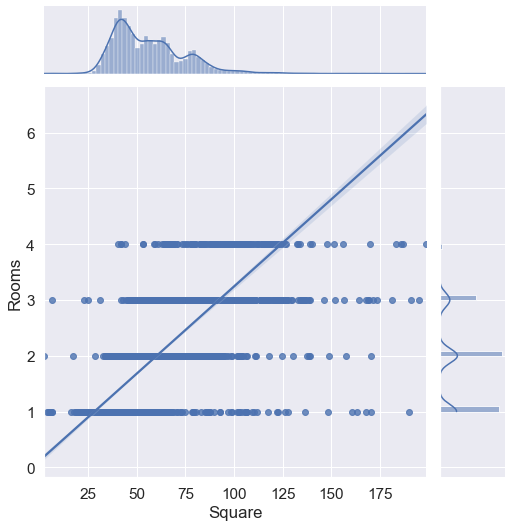

In [83]:
grid = sns.jointplot(dftr['Square'], dftr['Rooms'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

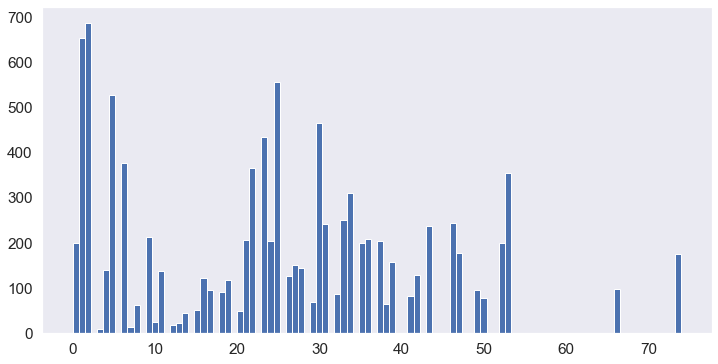

In [84]:
dftr['Social_1'].hist(figsize=(12,6), bins=100, grid=False);

#### С помощью матрицы корреляций, гистограмм и графиков распределения и плотности принимаем решение сгенерировать признаки отношения площадь-комнаты и категоризации по количеству комнат, площади кухни и соц.объектов.

In [85]:
dftr['SquareRooms'] = (dftr['Square'] / dftr['Rooms'])
dftst['SquareRooms'] = (dftst['Square'] / dftst['Rooms'])

dftr['MidRooms'] = (dftr['Rooms'].between(2, 3, inclusive=True)) * 1
dftst['MidRooms'] = (dftst['Rooms'].between(2, 3, inclusive=True)) * 1
dftr['LowRooms'] = (dftr['Rooms'] < 2) * 1
dftst['LowRooms'] = (dftst['Rooms'] < 2) * 1

dftr['MidKitch'] = (dftr['KitchenSquare'].between(5, 15, inclusive=True)) * 1
dftst['MidKitch'] = (dftst['KitchenSquare'].between(5, 15, inclusive=True)) * 1
dftr['LowKitch'] = (dftr['KitchenSquare'] < 5) * 1
dftst['LowKitch'] = (dftst['KitchenSquare'] < 5) * 1

dftr['MidSocial'] = (dftr['Social_1'].between(15, 40, inclusive=True)) * 1
dftst['MidSocial'] = (dftst['Social_1'].between(15, 40, inclusive=True)) * 1

#### Сгенерированы бинарные признаки.

In [86]:
dftr['Ecology_3_bin'] = dftr['Ecology_3'].replace({'A':0, 'B':1})
dftr['Shops_2_bin'] = dftr['Shops_2'].replace({'A':0, 'B':1})

dftst['Ecology_3_bin'] = dftst['Ecology_3'].replace({'A':0, 'B':1})
dftst['Shops_2_bin'] = dftst['Shops_2'].replace({'A':0, 'B':1})

#### Сгенерирован и преобразован в долевое представление признак количества домов в районе и категориальный признак размера района.

In [87]:
district_size = dftr['DistrictId'].value_counts(normalize=True).reset_index().rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
dftr = dftr.merge(district_size, on='DistrictId', how='left')
district_size = dftst['DistrictId'].value_counts(normalize=True).reset_index().rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
dftst = dftst.merge(district_size, on='DistrictId', how='left')

In [88]:
(dftr['DistrictSize'] > 0.01).value_counts()

True     5069
False    4931
Name: DistrictSize, dtype: int64

In [89]:
dftr['IsDistrictLarge'] = (dftr['DistrictSize'] > 0.01).astype(int)
dftst['IsDistrictLarge'] = (dftst['DistrictSize'] > 0.01).astype(int)

In [90]:
dftr.groupby(["IsDistrictLarge"])["Price"].mean()

IsDistrictLarge
0    245930.782920
1    183212.444965
Name: Price, dtype: float64

#### На основе 'DistrictSize' сгенерированы признаки: отношение количества соц.объектов к размеру района; отношение количества мед.объектов к размеру района; 

In [91]:
dftr['SocialDistrict'] = (dftr['Social_2'] / dftr['DistrictSize'])
dftst['SocialDistrict'] = (dftst['Social_2'] / dftst['DistrictSize'])

dftr['HealthDistrict'] = (dftr['Healthcare_2'] / dftr['DistrictSize'])
dftst['HealthDistrict'] = (dftst['Healthcare_2'] / dftst['DistrictSize'])

### Промежуточное сохранение данных:

In [92]:
dftr.to_csv(TRAIN_PREPARED_DATASET_PATH, sep=",", index=False)
dftst.to_csv(TEST_PREPARED_DATASET_PATH, sep=",", index=False)

### Загрузка данных:

In [93]:
TRAIN_DATASET_PATH = './/prepared_train_hard.csv'
TEST_DATASET_PATH = './/prepared_test_hard.csv'

In [94]:
dftr = pd.read_csv(TRAIN_DATASET_PATH)
dftst = pd.read_csv(TEST_DATASET_PATH)

### Отбор признаков для нормализации и нормализация данных:

In [95]:
dftr.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Healthcare_2', 'Shops_1', 'Shops_2', 'Price', 'OtherSquare',
       'SquareRooms', 'MidRooms', 'LowRooms', 'MidKitch', 'LowKitch',
       'MidSocial', 'Ecology_3_bin', 'Shops_2_bin', 'DistrictSize',
       'IsDistrictLarge', 'SocialDistrict', 'HealthDistrict'],
      dtype='object')

In [96]:
feature_names_for_stand = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Social_1', 'Social_2', 'Social_3',
                 'Healthcare_1', 'Healthcare_2', 'Shops_1', 'OtherSquare', 'DistrictSize','IsDistrictLarge', 'SquareRooms',
                           'SocialDistrict', 'HealthDistrict']

In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [98]:
stand_features = scaler.fit_transform(dftr[feature_names_for_stand])
dftr[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)

In [99]:
stand_features = scaler.fit_transform(dftst[feature_names_for_stand])
dftst[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)

### Разбиение тренировочного датасета:

In [100]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Social_1', 'Social_2', 'Social_3',
                 'Healthcare_1', 'Healthcare_2', 'Shops_1']

new_feature_names = ['OtherSquare','Ecology_3_bin','Shops_2_bin', 'DistrictSize', 'IsDistrictLarge', 
                     'MidRooms', 'LowRooms', 'MidKitch', 'LowKitch', 'MidSocial','SquareRooms','SocialDistrict', 
                     'HealthDistrict']

target_name = 'Price'

In [101]:
X = dftr[feature_names + new_feature_names]
y = dftr[target_name]
Test = dftst[feature_names + new_feature_names]

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

### Построение модели и проверка результатов на тренировочном датасете:

Train R2:	0.832
Valid R2:	0.757
Overfitting:    9.01%


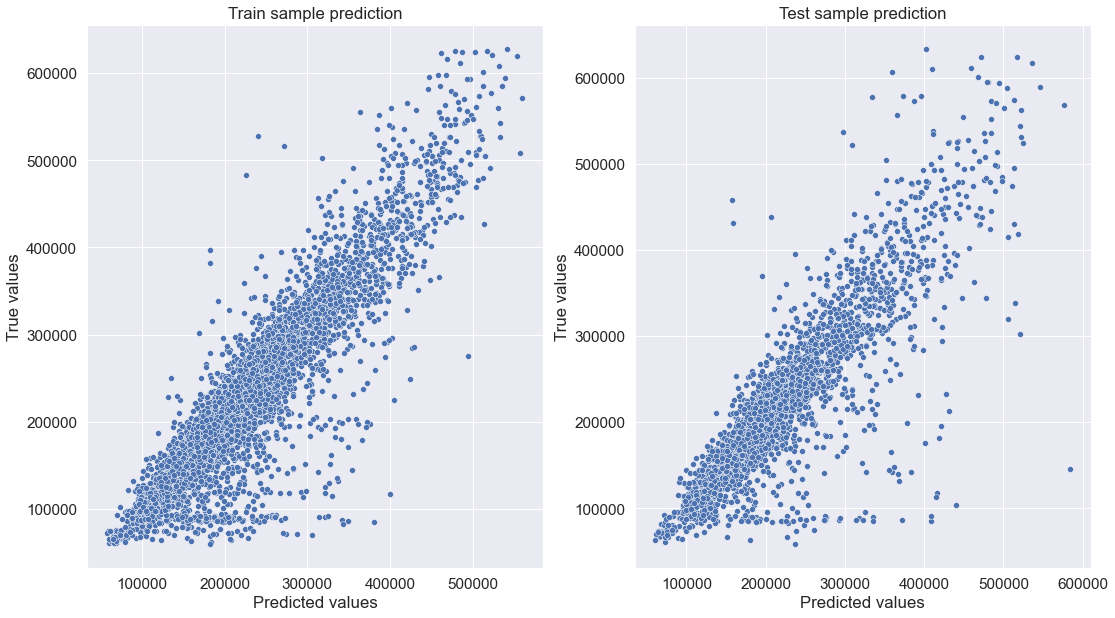

In [103]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=4,
                                     min_samples_leaf=120,
                                     random_state=12,  
                                     n_estimators=500)
gb_model.fit(X_train, y_train)

y_train_preds = gb_model.predict(X_train)
y_test_preds = gb_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

### Оценка важности признаков:

In [104]:
feature_importances = pd.DataFrame(zip(X_train.columns, 
                                       gb_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False, inplace=True)

In [105]:
feature_importances

,feature_name,importance
1,Square,0.444909
25,SocialDistrict,0.224209
17,DistrictSize,0.070086
10,Social_3,0.051973
7,Ecology_1,0.029431
6,HouseYear,0.021942
0,Rooms,0.020647
26,HealthDistrict,0.017040
2,LifeSquare,0.015441
9,Social_2,0.013644


### Предсказание цен по тестовому датасету и запись результатов в файл:

In [106]:
Price = gb_model.predict(Test)

In [107]:
Price.shape

(5000,)

In [108]:
Price = np.round(Price, 2)

In [109]:
test_id = dftst["Id"]
pred_df = pd.DataFrame()
pred_df["Id"] = test_id
pred_df["Price"] = Price
pred_df.to_csv("./predictions_GB.csv", index=False)